In [12]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [13]:
data=np.array([[float(j) for j in e.strip().split()] for e in open("../data/data.txt")])
data

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.]])

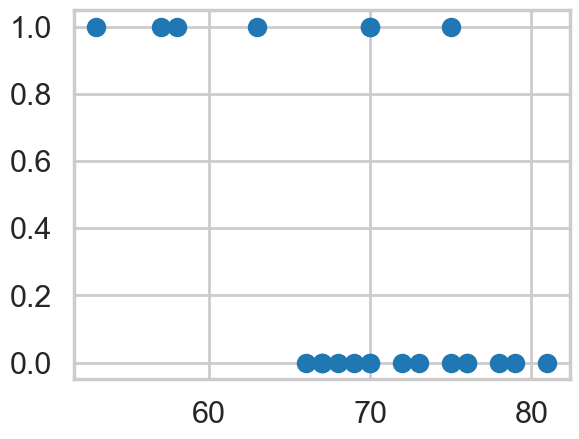

In [14]:
dat = pd.DataFrame(data, columns = ['temp', 'failure'])
plt.scatter(dat["temp"], dat['failure'])

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [18]:
X = dat["temp"].values
y = dat["failure"].values
y

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [19]:
model.fit(X.reshape(-1,1),y)

LogisticRegression()

In [20]:
model.score(X.reshape(-1,1),y)

0.8695652173913043

In [21]:
model.intercept_

array([14.86192709])

In [22]:
model.coef_

array([[-0.22950051]])

In [23]:
x = np.linspace(50, 85, 1000)
y_pred = model.predict(x.reshape(-1,1))

In [24]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

(-0.1, 1.1)

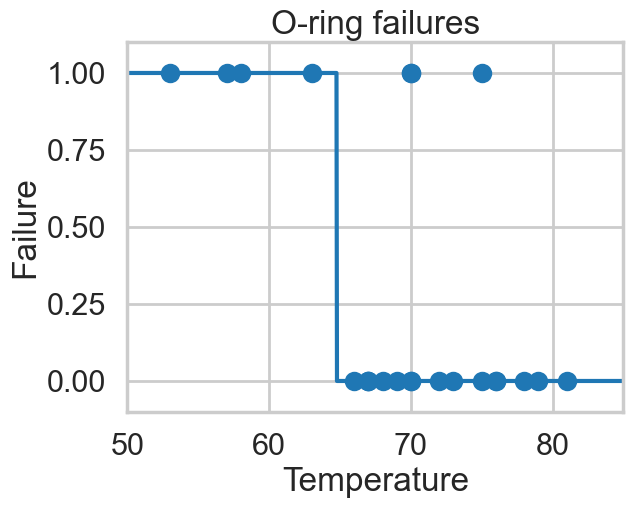

In [25]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_pred)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

#Square wave transition from success to failure (I'd prefer to see probabilities)

In [26]:
y_predprob = model.predict_proba(x.reshape(-1,1))
y_predprob

array([[0.03270734, 0.96729266],
       [0.03296269, 0.96703731],
       [0.03321995, 0.96678005],
       ...,
       [0.99033503, 0.00966497],
       [0.99041169, 0.00958831],
       [0.99048774, 0.00951226]])

(-0.1, 1.1)

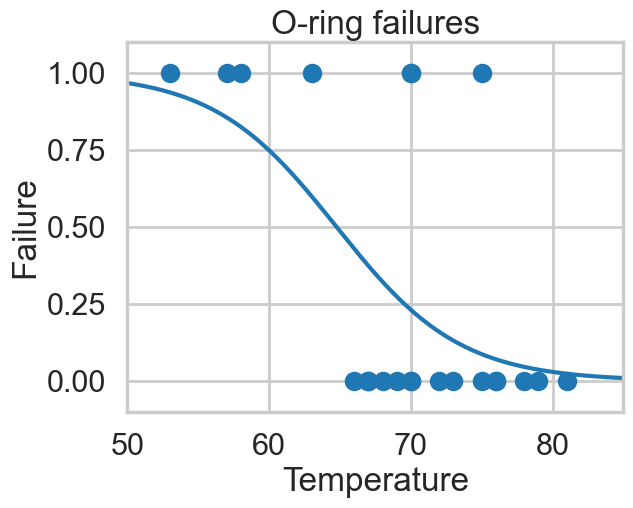

In [27]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_predprob[:,1])    #y_predprob has both probability and (1-y_predprob) - so we only plot column [:,1]

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

In [29]:
df = pd.read_csv("../data/titanic.csv") 
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
1,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
3,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
4,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [30]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.275811
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.743772
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [31]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           0
cabin       1014
embarked       0
dtype: int64

In [32]:
df['age'] = df['age'].fillna(df['age'].median())

In [33]:
y = df["survived"]
X = df[["pclass","age","sex","sibsp","parch","fare","embarked"]]

In [34]:
X.head()

,pclass,age,sex,sibsp,parch,fare,embarked
0,1,55.0,female,2,0,25.7000,S
1,1,49.0,female,0,0,25.9292,S
2,1,48.0,female,0,0,25.9292,S
3,1,19.0,female,0,2,26.2833,S
4,1,58.0,female,0,0,26.5500,S


In [35]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(X['sex'])
sex = le_sex.transform(X['sex'])
X = X.drop(['sex'], axis = 1)
X['sex'] = sex
X

,pclass,age,sibsp,parch,fare,embarked,sex
0,1,55.0,2,0,25.7000,S,0
1,1,49.0,0,0,25.9292,S,0
2,1,48.0,0,0,25.9292,S,0
3,1,19.0,0,2,26.2833,S,0
4,1,58.0,0,0,26.5500,S,0
...,...,...,...,...,...,...,...
1304,3,14.5,8,2,69.5500,S,1
1305,3,28.0,8,2,69.5500,S,1
1306,3,28.0,8,2,69.5500,S,1
1307,3,28.0,8,2,69.5500,S,1


In [36]:
X["embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [37]:
X["embarked"].values.reshape(-1,1)

array([['S'],
       ['S'],
       ['S'],
       ...,
       ['S'],
       ['S'],
       ['S']], dtype=object)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
titanic_lm = LogisticRegression

In [51]:
titanic_lm = LogisticRegression(max_iter=1000)

In [52]:
titanic_lm.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_train_predicted = titanic_lm.predict(X_train)
y_train_predprob = titanic_lm.predict_proba(X_train)

In [54]:
titanic_lm.score(X_train,y_train)

0.7981651376146789

In [57]:
y_predicted = titanic_lm.predict(X)
y_predprob = titanic_lm.predict_proba(X)

In [58]:
df['survive_predicted'] = y_predicted
df['survive_probability'] = y_predprob[:,1]

In [59]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survive_predicted,survive_probability
0,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,1,0.708002
1,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,0.837962
2,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,1,0.842248
3,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,1,0.920470
4,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0.795199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,0,0.015493
1305,3,0,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,0.010125
1306,3,0,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,0.010125
1307,3,0,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,0.010125


In [61]:
# Assuming you have already run the code above
# Define costs for false positives and false negatives
cost_fp = 10  # False positive cost
cost_fn = 5   # False negative cost

# Add the actual outcomes to the dataframe
df['actual'] = y  # 'y' is the actual survival column from the original Titanic dataset

# Identify misclassification types
df['false_positive'] = ((df['survive_predicted'] == 1) & (df['actual'] == 0)).astype(int)  # Predicted survived but didn't
df['false_negative'] = ((df['survive_predicted'] == 0) & (df['actual'] == 1)).astype(int)  # Predicted didn't survive but did

# Calculate total cost for each instance
df['cost'] = df['false_positive'] * cost_fp + df['false_negative'] * cost_fn

# Calculate the total cost across the dataset
total_cost = df['cost'].sum()

print(f"Total Misclassification Cost: {total_cost}")


Total Misclassification Cost: 1885


In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
y_true = y  # Actual survival outcomes (1 for survived, 0 for not survived)
y_pred_proba = y_predprob[:, 1]  # Predicted probability of survival

# Compute the Mean Squared Error
mse = mean_squared_error(y_true, y_pred_proba)

# Take the square root to get RMSE
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")
 

Root Mean Squared Error (RMSE): 0.38282007202951385


In [63]:
from sklearn.metrics import r2_score

# Actual outcomes (ground truth)
y_true = y  # Actual survival outcomes (1 for survived, 0 for not survived)

# Predicted probabilities (for survival, i.e., the positive class)
y_pred_proba = y_predprob[:, 1]

# Calculate the R² score
r2 = r2_score(y_true, y_pred_proba)

print(f"R² Score: {r2}")


R² Score: 0.37920220108350167
